# Data Analysis Practical Test E15: Test Notebook

<div style="text-align: right;"><code> TAESEUNG HAHN </code></div>
<div style="text-align: right;"><code> https://github.com/tshahn/DataAnalPrac </code></div>

---

---

## Question No. 1

주어진 데이터 파일은 특정 철강사의 제품코드, 불량코드, 그리고 공정 과정에서 발생한 데이터를 담고 있다.  
해당 데이터를 이용하여 다음 문제의 답변을 작성하시오.

제공 데이터 파일: E15Q1_data_raw.csv  
 - 1-24번 컬럼: Analog Data
 - 25번 컬럼: 제품코드 (Binary)
 - 26번 컬럼: 불량코드 (Integer with range 1 to 7)

#### ① EDA를 실시하여 결과값을 제시하고, 상관분석을 시행하여 변수 선택 및 파생 변수 생성과정을 풀이하시오.

##### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('./data/E15Q1_data_raw.csv')

In [3]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,SteelType,Fault
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,2,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,2,1


In [73]:
data.shape

(1941, 27)

##### Check and Transform DType

In [46]:
data.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
SteelType                 object
Fault                     object
dtype: object

SteelType 은 제품코드를, Fault는 불량코드를 나타내는 범주형 변수이다.

따라서 데이터타입을 'category' 형태로 바꾸어준다.

In [47]:
data['SteelType']=data['SteelType'].astype('str')
data['Fault']=data['Fault'].astype('str')

In [48]:
data.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
SteelType                 object
Fault                     object
dtype: object

##### EDA: Check missing values

In [49]:
data.isnull().sum() / len(data)

X_Minimum                0.0
X_Maximum                0.0
Y_Minimum                0.0
Y_Maximum                0.0
Pixels_Areas             0.0
X_Perimeter              0.0
Y_Perimeter              0.0
Sum_of_Luminosity        0.0
Minimum_of_Luminosity    0.0
Maximum_of_Luminosity    0.0
Length_of_Conveyer       0.0
Steel_Plate_Thickness    0.0
Edges_Index              0.0
Empty_Index              0.0
Square_Index             0.0
Outside_X_Index          0.0
Edges_X_Index            0.0
Edges_Y_Index            0.0
Outside_Global_Index     0.0
LogOfAreas               0.0
Log_X_Index              0.0
Log_Y_Index              0.0
Orientation_Index        0.0
Luminosity_Index         0.0
SigmoidOfAreas           0.0
SteelType                0.0
Fault                    0.0
dtype: float64

결측값이 있는지 확인해본 결과 존재하지 않음을 볼 수 있다.

##### EDA: Check Distributions

- 상관관계
- 각 변수별 분포확인

In [50]:
# 데이터셋의 칼럼

columns=data.columns

columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'SteelType',
       'Fault'],
      dtype='object')

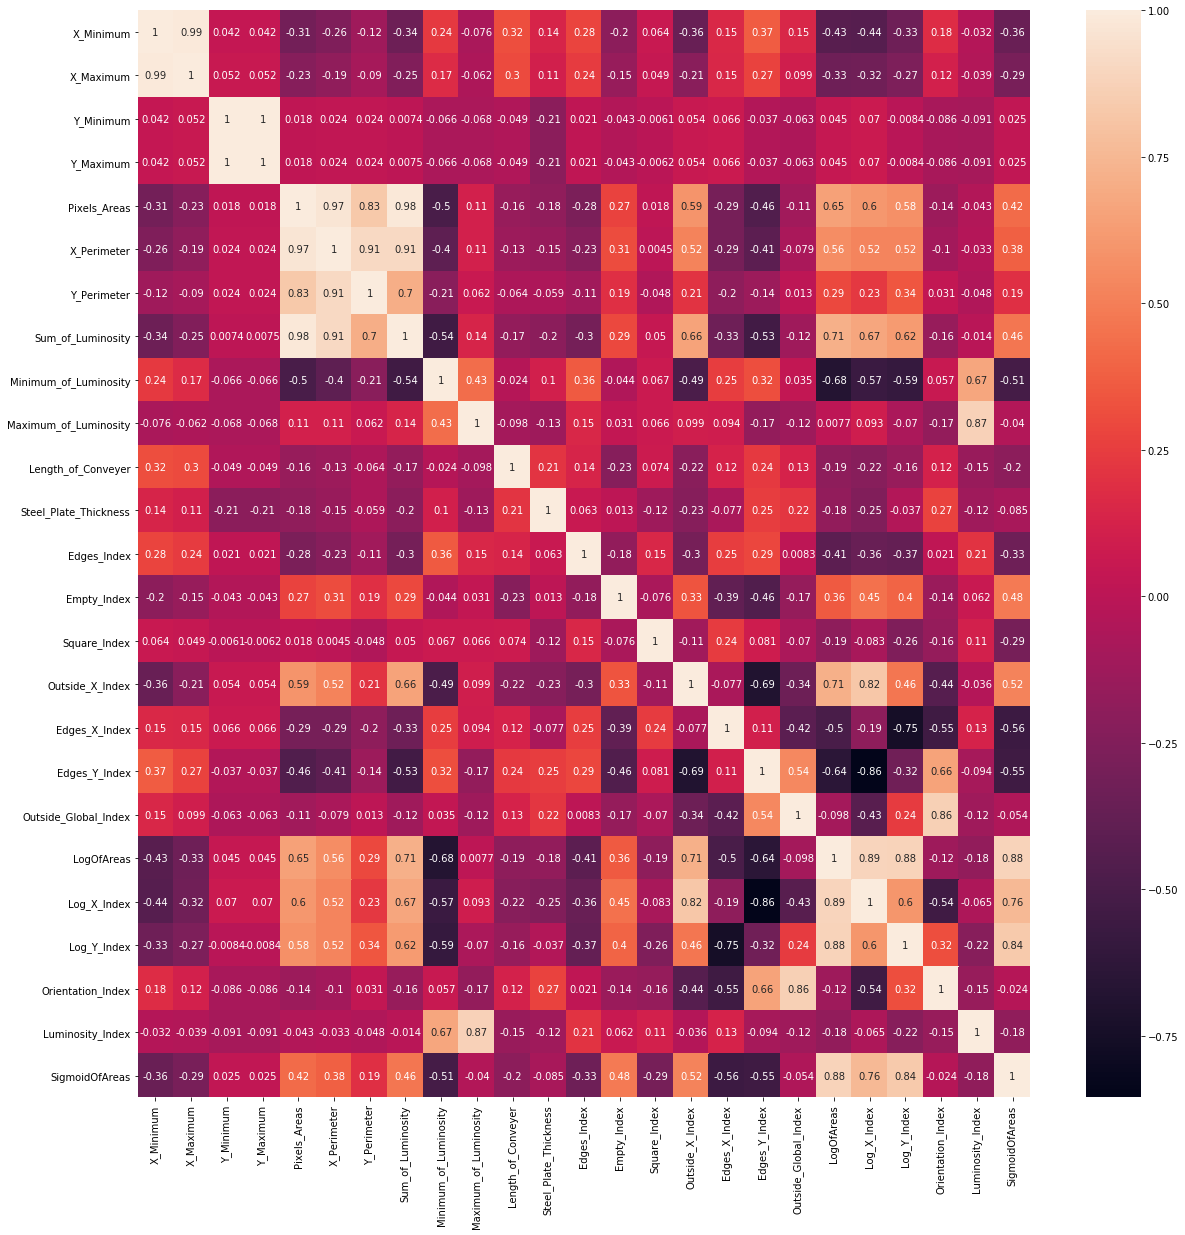

In [51]:
corr=data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

상관관계를 확인하기 위하여 피어슨 상관계수를 구하였을 때, 절대값이 0.7 이상으로 강한 상관관계를 보여주는 변수 집합은

1. X_Minimum, X_Maximum
2. Y_Minimum, Y_Maximum
3. Pixels_Areas, X_Perimeter
4. Pixels_Areas, Y_Perimeter
5. Pixels_Areas, Sum_of_Luminosity
6. X_Perimeter, Y_perimeter
7. X_Perimeter, Sum_of_Luminosity
8. Y_Perimeter, Sum_of_Luminosity
9. Sum_of_Luminosity, LogOfAreas
10. Maximum_of_Luminosity, Luminosity_index
11. Outside_X_Index, LogOfAreas
12. Outside_X_Index, Log_X_Index
13. Edges_X_Index, Log_Y_Index
14. Edges_Y_Index, Log_X_Index
15. Outside_Global_Index, Orientation_Index
16. LogOfAreas, Log_X_Index
17. LogOfAreas, Log_Y_Index
18. LogOfAreas, SigmoidOfAreas
19. Log_X_Index, SigmoidOfAreas
20. Log_Y_Index, SigmoidOfAreas

총 20개임을 볼 수 있다.

변수를 적절히 선택하기 위해서, 먼저 변수의 분포를 확인한다.

In [11]:
data.shape

(1941, 27)

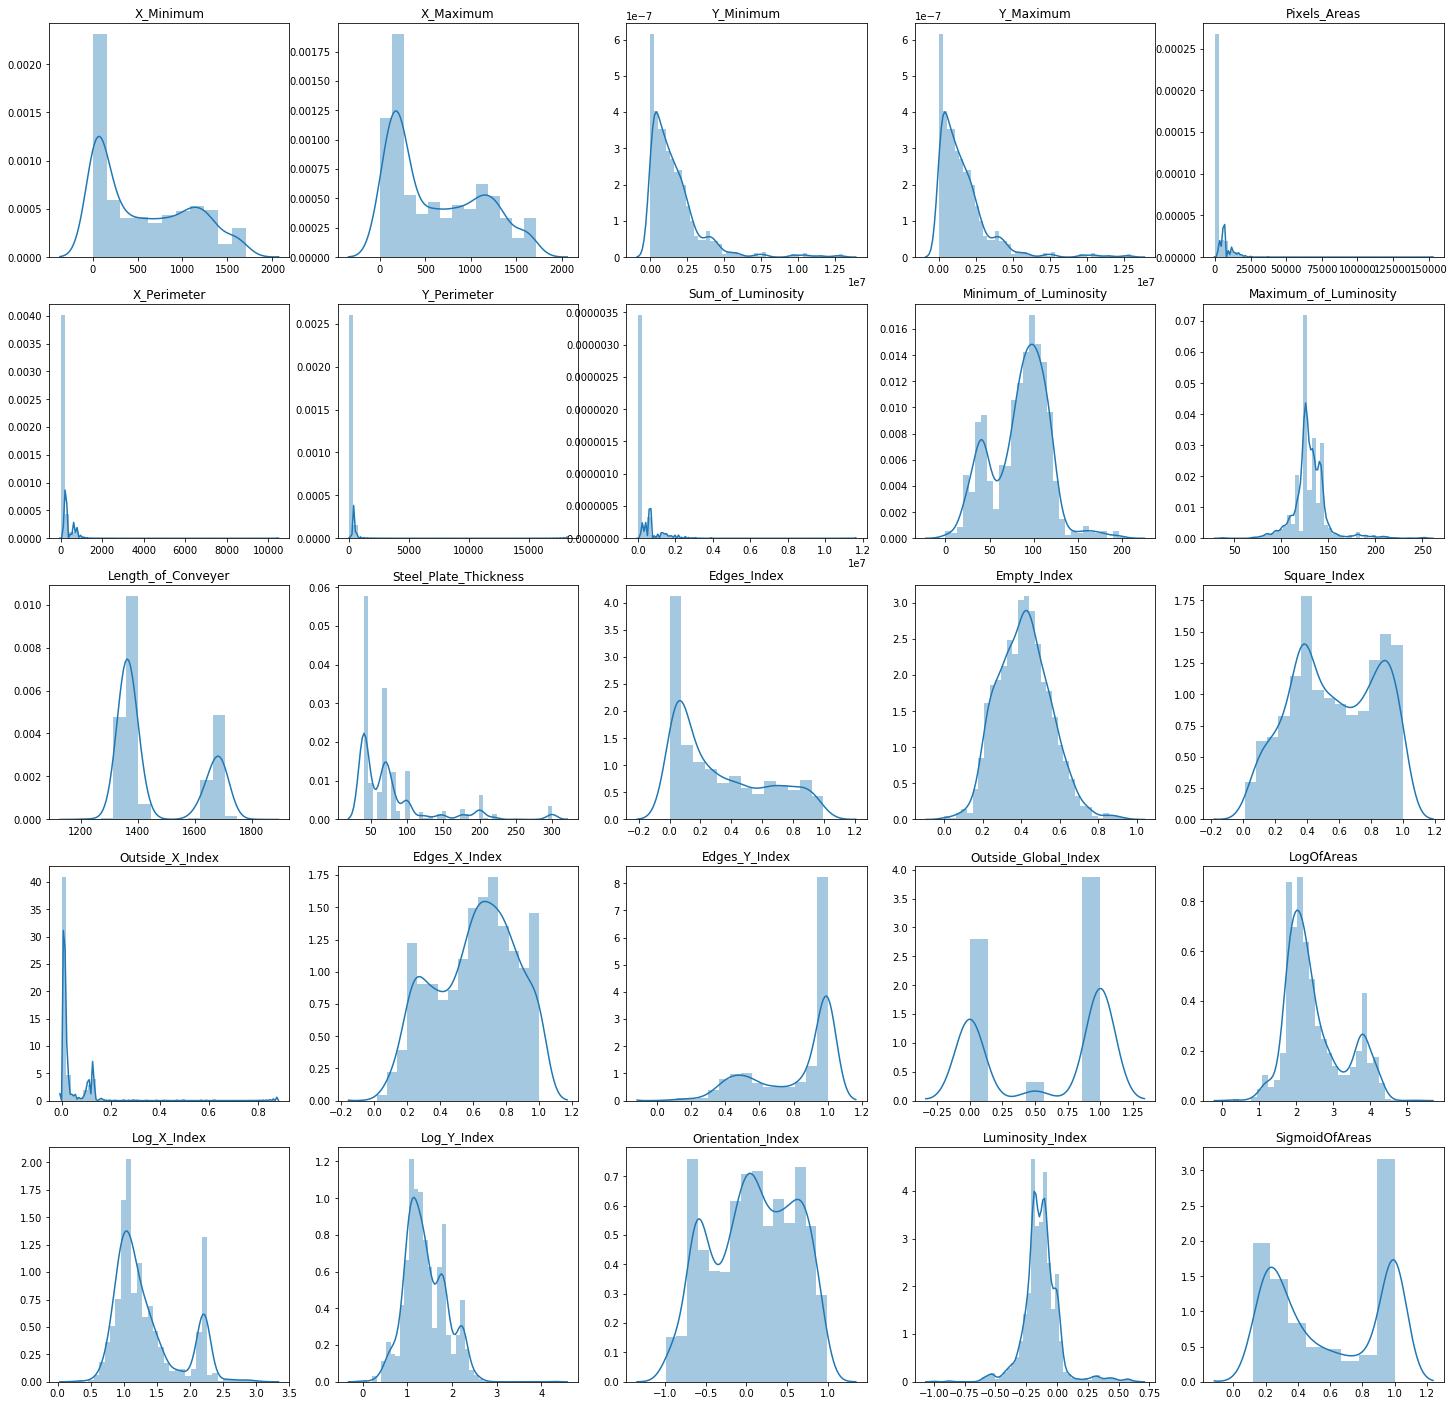

In [18]:
figure, axes=plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(25,25)

j=0
k=0
for i in range(25):
    if k==5:
        j+=1
        k=0
    sns.distplot(data[data.columns[i]], ax=axes[j][k])
    axes[j][k].set(title=data.columns[i], xlabel=None)
    k+=1    

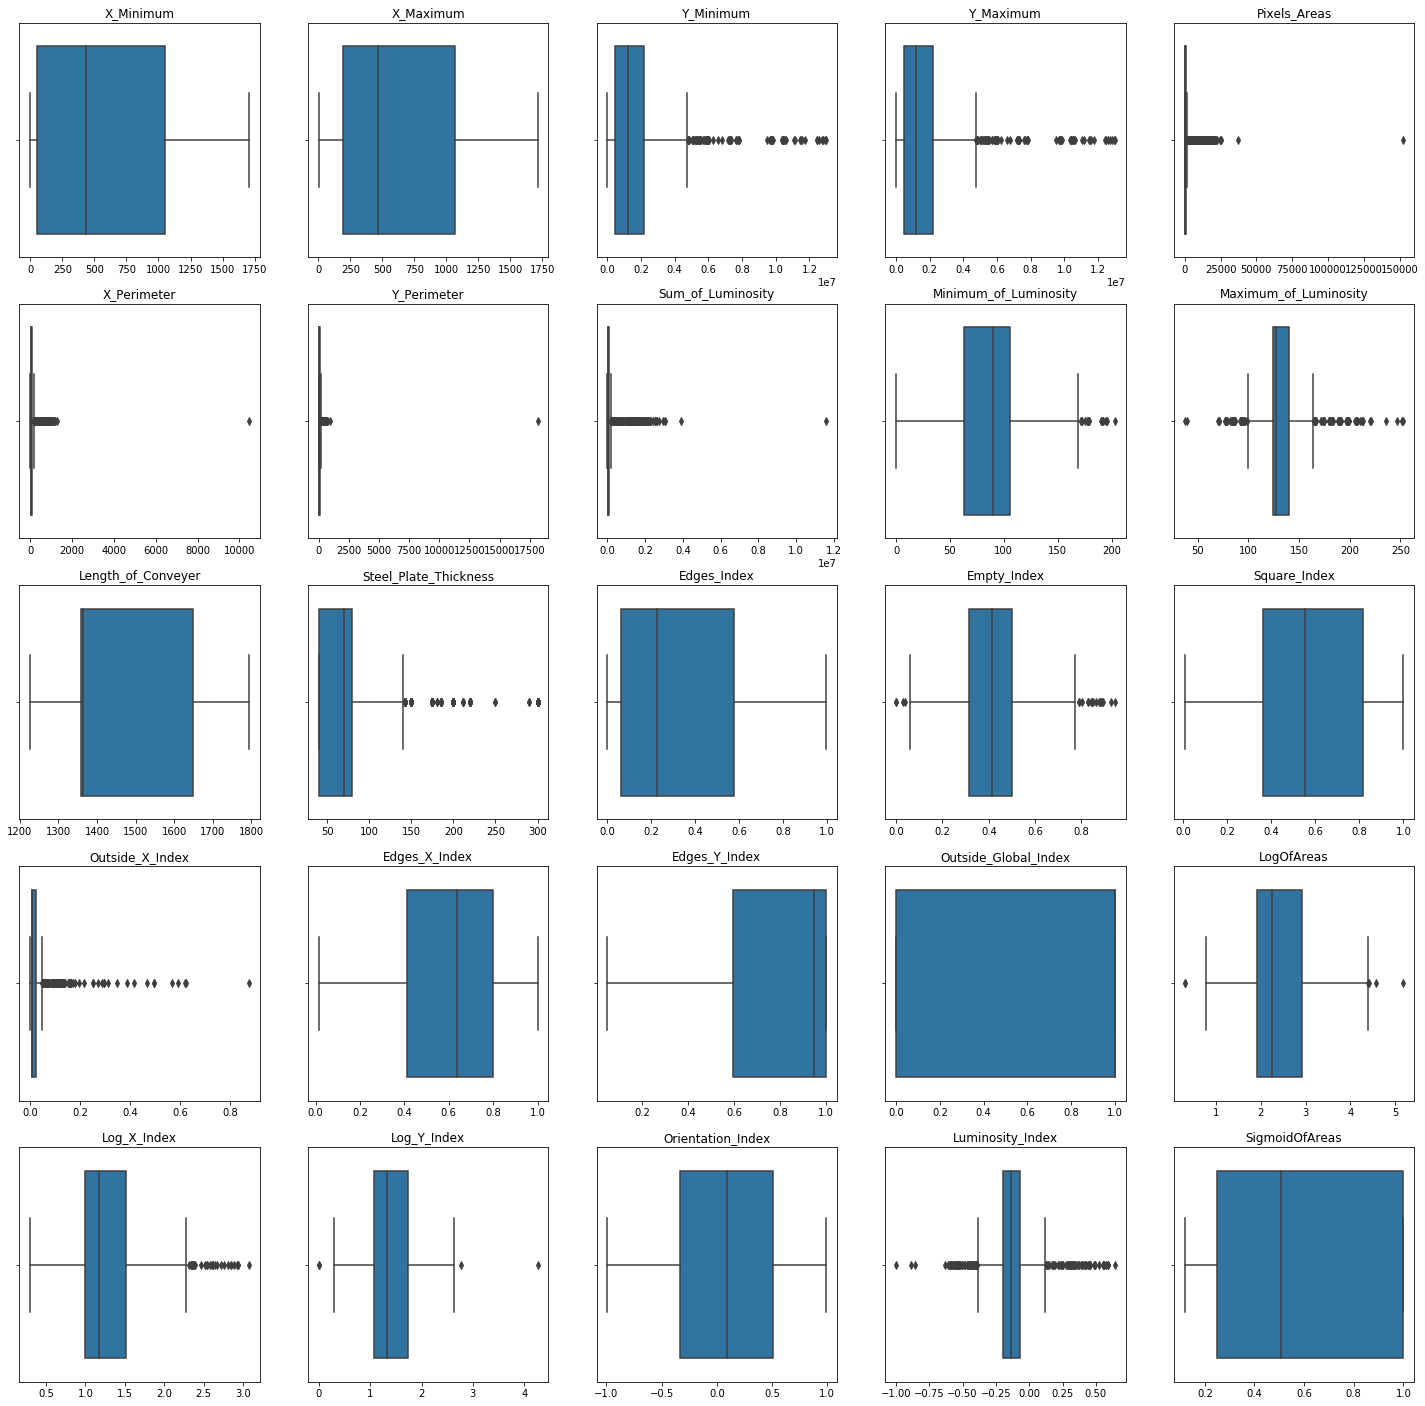

In [21]:
figure, axes=plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(25,25)

j=0
k=0
for i in range(25):
    if k==5:
        j+=1
        k=0
    sns.boxplot(data[data.columns[i]], ax=axes[j][k])
    axes[j][k].set(title=data.columns[i], xlabel=None)
    k+=1    

대다수의 값의 분포가 치우쳐져 있으므로, 이상치를 제거한 후 다시 분포를 확인해본다.

In [52]:
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    
    return np.where((x>upper)|(x<lower))

In [57]:
numeric=list()

for i in data.columns:
    if type(data[i][0])!=type('str'):
        numeric.append(i)
        
numeric

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [59]:
# boxplot 상 IQR 외부에 있던 변수들의 이상치 제거

outlier_index=set()

for i in numeric:
    outlier_index.update(find_outliers(data[i])[0][:])
    
outlier_index=list(outlier_index)

In [71]:
new_data=data.drop(outlier_index).reset_index(drop=True)

In [72]:
new_data.shape

(1117, 27)

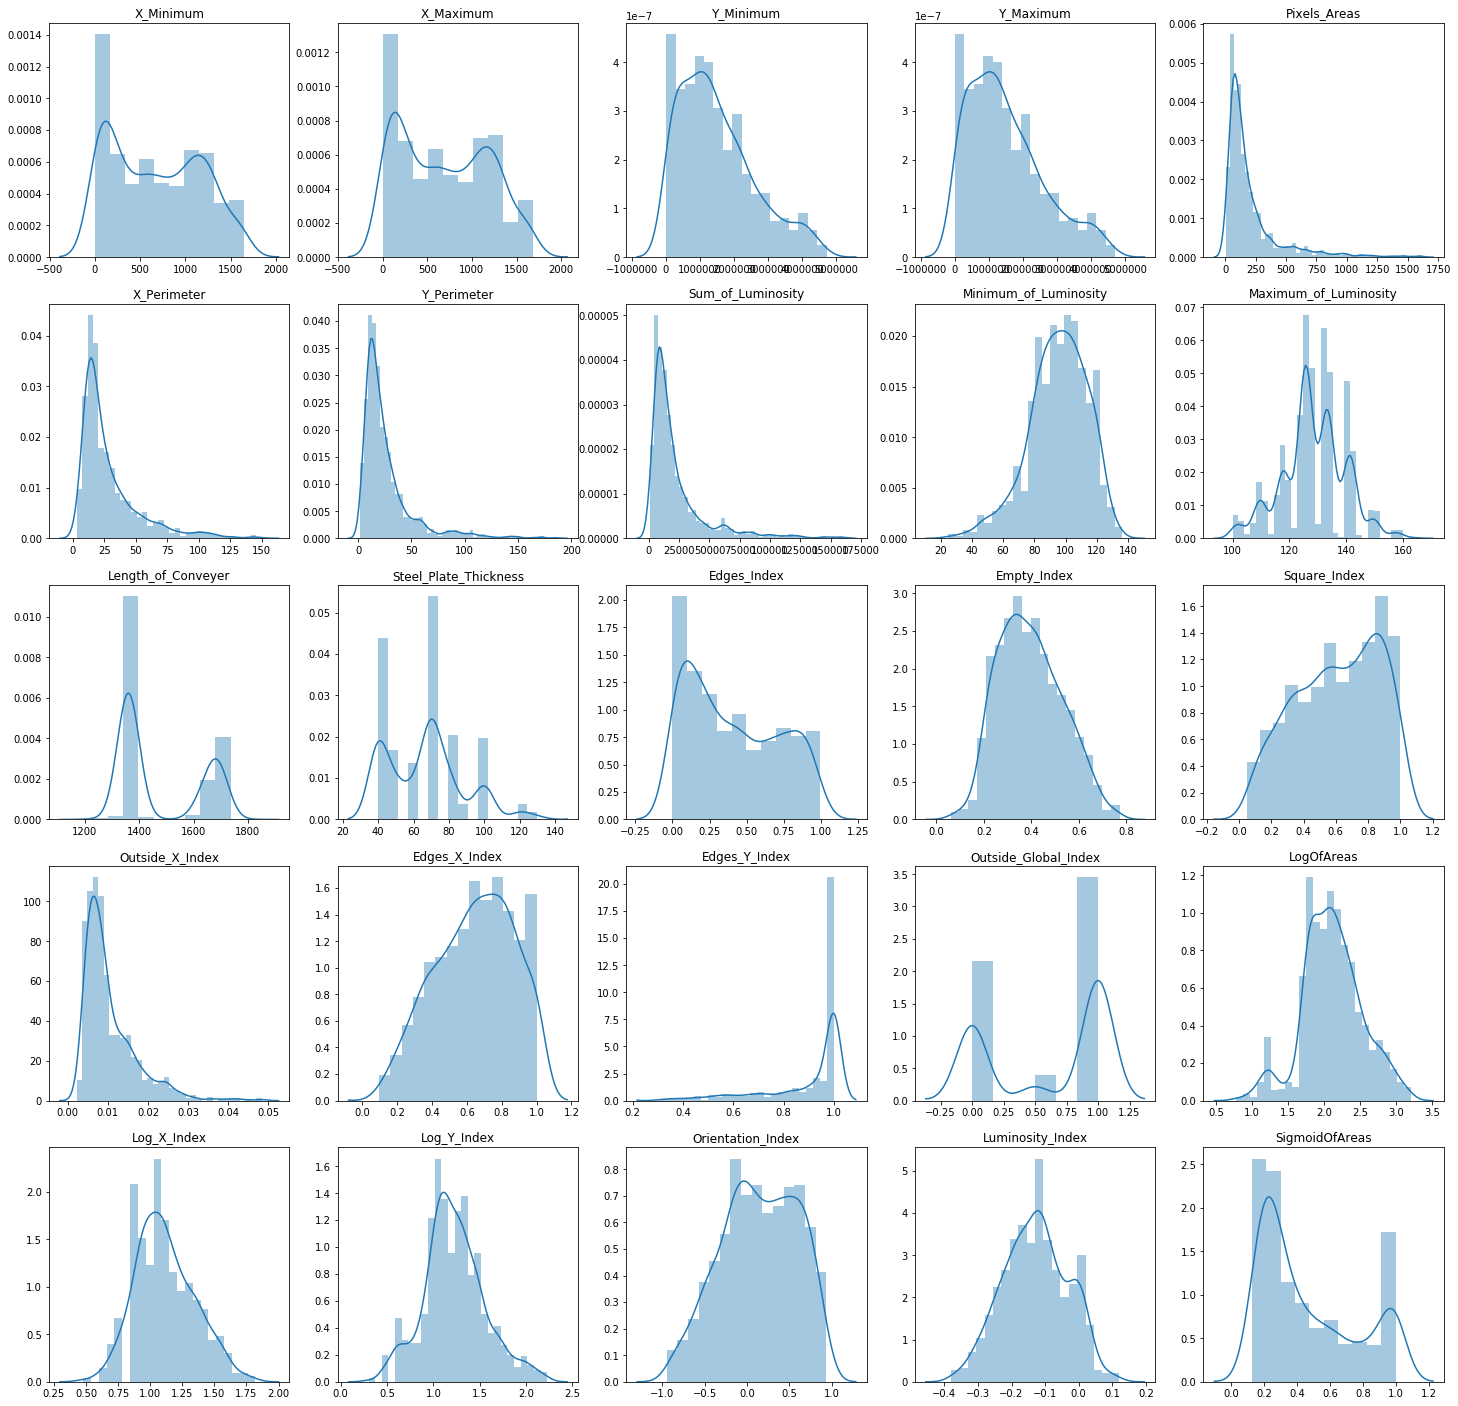

In [74]:
figure, axes=plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(25,25)

j=0
k=0
for i in range(25):
    if k==5:
        j+=1
        k=0
    sns.distplot(new_data[new_data.columns[i]], ax=axes[j][k])
    axes[j][k].set(title=new_data.columns[i], xlabel=None)
    k+=1    

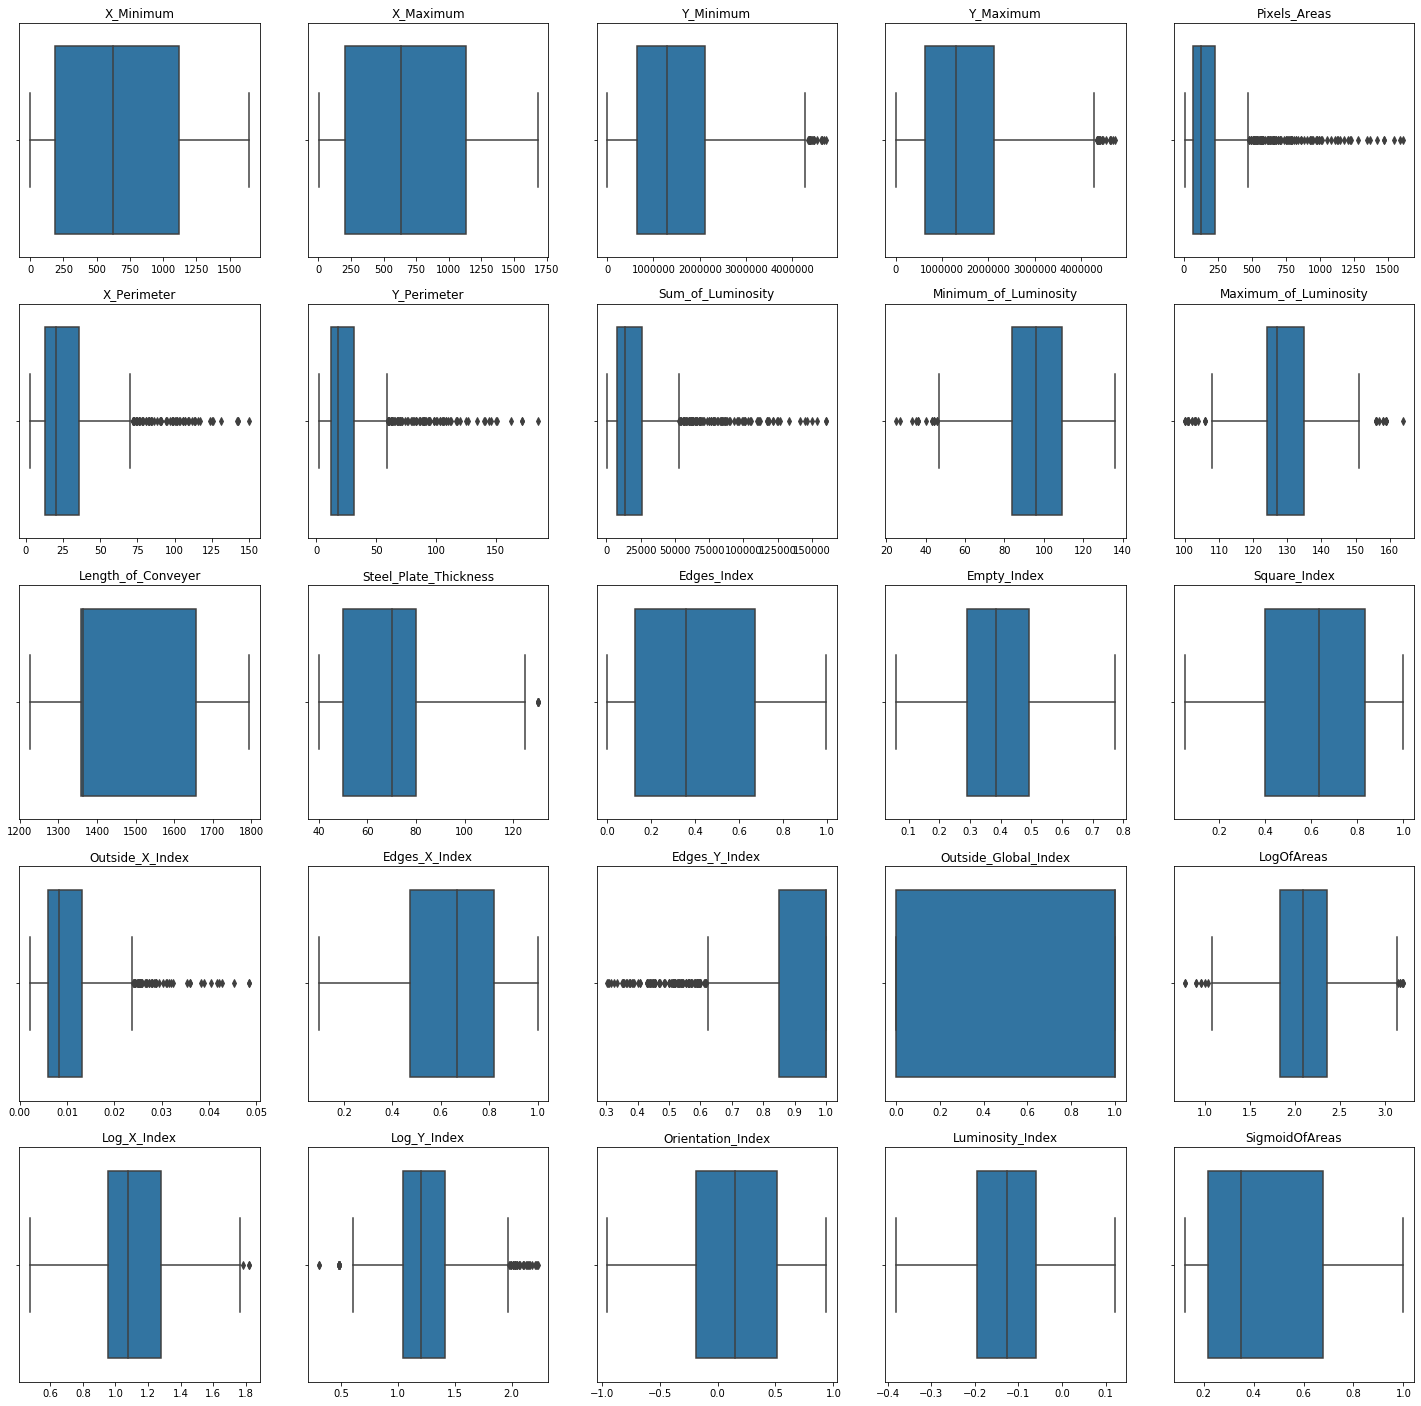

In [75]:
figure, axes=plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(25,25)

j=0
k=0
for i in range(25):
    if k==5:
        j+=1
        k=0
    sns.boxplot(new_data[new_data.columns[i]], ax=axes[j][k])
    axes[j][k].set(title=new_data.columns[i], xlabel=None)
    k+=1  

이상치가 제거된 이후, 전반적으로 정규분포를 따르는 분포를 보이며,

박스상자 그림을 통해서도 상당수의 이상치가 제거되었음을 볼 수 있다.

이상치를 제거한 이후 다시 상관관계를 살펴본 결과

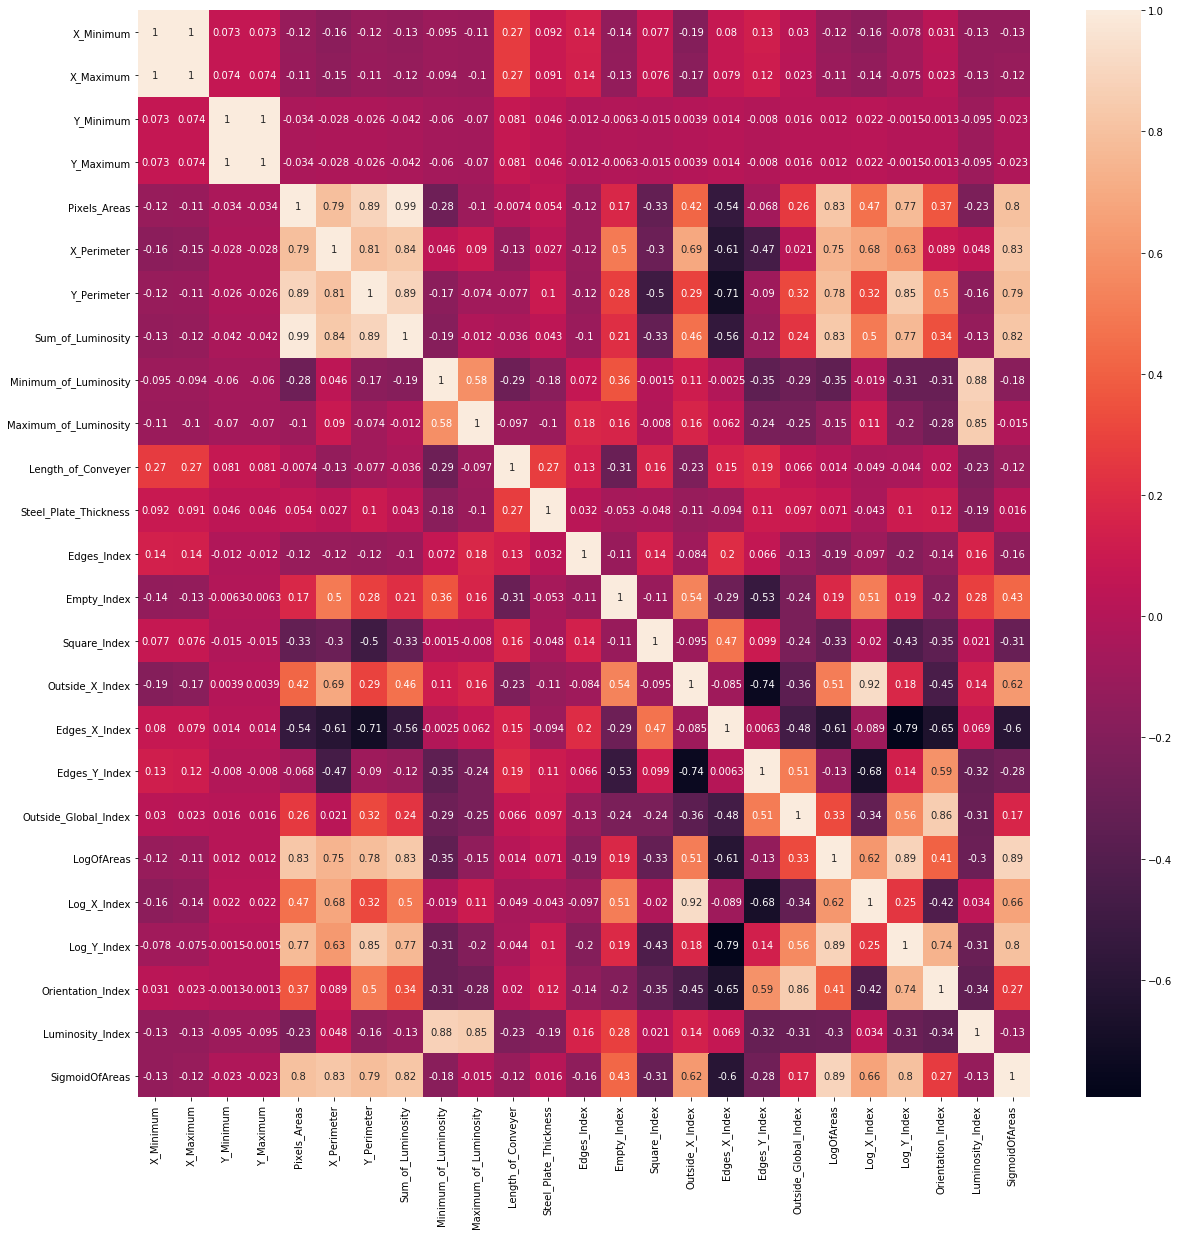

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr(), annot=True)

이제 다중공선성 체크를 통해, 변수를 선택하려 한다.

In [80]:
new_data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'SteelType',
       'Fault'],
      dtype='object')

In [83]:
y=new_data['Fault']
X=new_data.drop('Fault', axis=1)

X=pd.get_dummies(new_data, drop_first=True)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#VIF로 다중공선성 제거 VIF<5 안전 10< VIF 위험

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns
vif.round(1)

,vif,features
0,1.321072e+06,X_Minimum
1,1.357608e+06,X_Maximum
2,6.073224e+11,Y_Minimum
3,6.073224e+11,Y_Maximum
4,1.651000e+02,Pixels_Areas
5,6.160000e+01,X_Perimeter
6,2.918000e+02,Y_Perimeter
7,1.924000e+02,Sum_of_Luminosity
8,1.537000e+02,Minimum_of_Luminosity
9,4.416000e+02,Maximum_of_Luminosity


In [86]:
#VIF에 따른 다중 공선성 자동제거 def
def X_filter_multi(X,thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:,variables].values,ix)
              for ix in range(X.iloc[:,variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif)>thresh:
            print('dropped'+X.iloc[:,variables].columns[maxloc])
            del variables[maxloc]
            if len(variables)>1:
                dropped = True
    print('Remain:')
    print(X.columns[variables])
    return variables

In [88]:
X_filter_multi(X,10.0)

droppedY_Minimum
droppedX_Maximum
droppedLogOfAreas
droppedLog_Y_Index
droppedLog_X_Index
droppedMaximum_of_Luminosity
droppedSum_of_Luminosity
droppedLength_of_Conveyer
droppedEdges_Y_Index
droppedMinimum_of_Luminosity
droppedOutside_X_Index
droppedY_Perimeter
droppedEdges_X_Index
droppedSigmoidOfAreas
droppedEmpty_Index
droppedOutside_Global_Index
Remain:
Index(['X_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
       'Steel_Plate_Thickness', 'Edges_Index', 'Square_Index',
       'Orientation_Index', 'Luminosity_Index', 'SteelType_2', 'Fault_2',
       'Fault_3', 'Fault_4', 'Fault_5', 'Fault_6', 'Fault_7'],
      dtype='object')


[0, 3, 4, 5, 11, 12, 14, 22, 23, 25, 26, 27, 28, 29, 30, 31]

VIF 가 10이 넘는 변수들을 제거한 결과

'X_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
       'Steel_Plate_Thickness', 'Edges_Index', 'Square_Index',
       'Orientation_Index', 'Luminosity_Index', 'SteelType_2', 'Fault_2',
       'Fault_3', 'Fault_4', 'Fault_5', 'Fault_6', 'Fault_7'
       
의 변수들이 남았다. 따라서 남은 변수들만 가지고 분석을 진행하려 한다.

In [89]:
X=X[['X_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
       'Steel_Plate_Thickness', 'Edges_Index', 'Square_Index',
       'Orientation_Index', 'Luminosity_Index', 'SteelType_2', 'Fault_2',
       'Fault_3', 'Fault_4', 'Fault_5', 'Fault_6', 'Fault_7']]

In [90]:
X.shape

(1117, 16)

---

#### ② 전체 데이터를 Train, Validataion, Test 용도로 분할하고 시각화하시오. (각 비율: 50%, 30%, 20%)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, xx, y_train, yy=train_test_split(X,y,test_size=0.5, random_state=0)

In [97]:
x_valid, x_test, y_valid, y_test=train_test_split(xx,yy, test_size=0.4, random_state=0)

In [98]:
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

x_valid.reset_index(drop=True, inplace=True)
y_valid.reset_index(drop=True, inplace=True)

x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [100]:
dataset={'Train':len(x_train),
'Validation':len(x_valid),
'Test':len(x_test)}

dt_set=pd.Series(dataset)
dt_set

Train         558
Validation    335
Test          224
dtype: int64

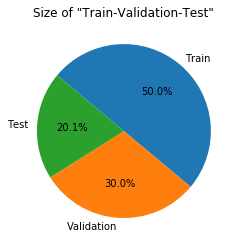

In [101]:
# 파이 차트

plt.pie(dt_set, labels=dt_set.index, autopct='%.1f%%', startangle=140, counterclock=False)
plt.axis='equal'
plt.title('Size of "Train-Validation-Test"')
plt.show()

---

#### ③ 불량코드 1에 대하여, Logistic Regression을 활용하여 이항분류 모형을 생성하시오.
#### 생성한 모형에 대한 최적의 Cut-Off Value를 선정 후, Confusion Matrix를 제시하시오. (반드시 시각화와 통계량을 포함시킬 것)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [119]:
y_train.replace(['2','3','4','5','6','7'],'0', inplace=True)
y_valid.replace(['2','3','4','5','6','7'],'0', inplace=True)
y_test.replace(['2','3','4','5','6','7'],'0', inplace=True)

y_train.replace(1,'1', inplace=True)
y_valid.replace(1,'1', inplace=True)
y_test.replace(1,'1', inplace=True)

In [120]:
total_y=pd.concat([y_train,y_valid,y_test]).reset_index(drop=True)
total_y.value_counts()

0    1014
1     103
Name: Fault, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix

logistic=LogisticRegression()
logistic.fit(x_train, y_train)
y_pred=logistic.predict(x_valid)

confusion_matrix(y_valid, y_pred)

array([[298,   0],
       [  0,  37]], dtype=int64)

In [122]:
from sklearn.metrics import f1_score

f1_score(y_valid, y_pred)

ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

---

#### ④ Logistic Regression을 제외하고 SVM을 포함하여 3가지 다항 분류 모형을 만들어 Precision과 Sensitivity(TPR)를 제시하시오.
#### 또한 모델향상과정과 최적화 과정을 통해 Confusion Matrix를 도출하시오.

---

#### ⑤ 상기 ③번과 ④번 4가지 모형 중 1가지를 선택하여 최적의 클러스터링 개수(단일집단~5개)를 제시하시오.
#### 또한 군집분석을 이용한 모형성능 향상 과정을 수행하여, 성능향상 전후의 F1 Score와 모형 평가 결과를 제시하시오.

---

## Question No. 2

주어진 3개의 파일들은 한 공장의 전력 사용량에 대한 데이터로써, 각각 날씨와 온도, 용도별 전력량계, 전력 총 사용량을 담고있다.  
해당 데이터를 종합적으로 이용하여 다음 문제를 풀이하시오.

데이터 파일 설명: 
1. E15Q21_usage.csv
    - 900초마다 기록된 900초 단위 전력 총 사용량
    - 1번 컬럼: Datetime (UnixTimestamp)
    - 2번 컬럼: Usage


2. E15Q22_weather.csv
    - 일자별 평균 기온
    - 1번 컬럼: Date (YYYY-MM-DD)
    - 2번 컬럼: Daily Average Temperature


3. E15Q23_usage_history.tsv
    - 1분에 2번씩 기록된 각 용도별 전력 누적사용량
    - 1번 컬럼: Time (HH:MM)
    - 2번 컬럼: Weather Class (A/B/C/D)
    - 3-7번 컬럼: 각 용도(A/B/C/D/E)별 전력 누적 사용량

---

##### LOAD DATA

#### ① 첫번째 제공 파일의 총사용량 컬럼을 용도별로 분류하고, 연월과 사용 목적별로 전력의 하루 평균 사용량을 구하여 도표를 도출하시오.

|YYYYMM|A|B|C|D|E|
|-|-|-|-|-|-|
|202001|__|__|__|__|__|
|202002|__|__|__|__|__|
|202003|__|__|__|__|__|


##### CREATE DIFF FROM CUMSUM

##### CREATE JOIN KEY

##### JOIN DATASETS

---

#### ② 요일별 평균 전력사용량을 도출하시오. 또한 가로축을 요일, 세로축을 평균사용량으로 하여 요일별 평균 사용량을 시각화하여 제출하시오.

---

#### ③ 요일별 총 전력 사용량의 평균값의 차이를 분석하여, 가장 큰 차이를 보이는 요일은 어떤 요일인지 제시하시오.

---

#### ④ 각 날짜별 평균 기온과 용도별 전력사용량의 관계를 분석하여, 기온과 가장 밀접한 관계를 지닌 사용 용도의 종류를 제시하시오.